In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('/content/weather.csv')
df = df.sample(frac = 1)
print(df.head())

      precipitation  temp_max  temp_min  wind weather
245             0.0      21.1      10.0   2.0     sun
932             0.0      23.9      13.3   2.2     sun
1045            0.0       7.8       1.1   7.7     sun
1395            0.0      16.1       7.8   1.7     fog
129             0.0      13.3       6.7   3.9    rain


In [5]:
print(df)

      precipitation  temp_max  temp_min  wind weather
245             0.0      21.1      10.0   2.0     sun
932             0.0      23.9      13.3   2.2     sun
1045            0.0       7.8       1.1   7.7     sun
1395            0.0      16.1       7.8   1.7     fog
129             0.0      13.3       6.7   3.9    rain
...             ...       ...       ...   ...     ...
87              1.3      10.6       7.2   5.9    rain
728             0.0       7.2       1.7   1.1     sun
601             0.0      25.0      16.7   2.7     sun
482             0.0      13.9      10.6   5.9     sun
880             0.0      20.6       8.9   4.5     sun

[1461 rows x 5 columns]


In [6]:
print(df.dtypes)

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object


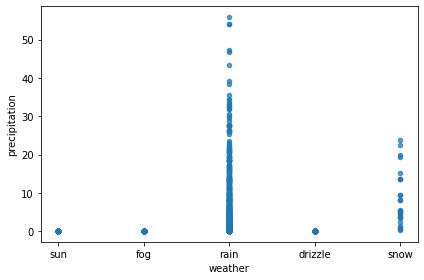

In [7]:
df.plot.scatter(x="weather", y="precipitation",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

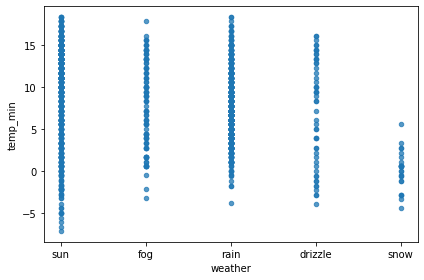

In [8]:
df.plot.scatter(x="weather", y="temp_min",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

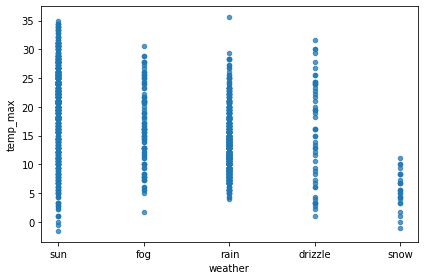

In [9]:
df.plot.scatter(x="weather", y="temp_max",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

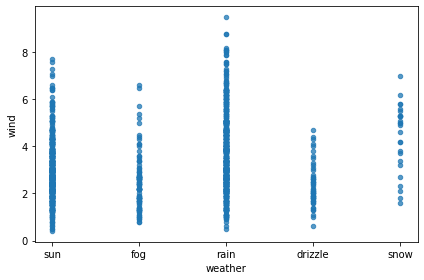

In [10]:
df.plot.scatter(x="weather", y="wind",linewidth=1,alpha=0.75)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X =df[['precipitation','temp_max', 'temp_min', 'wind']]
y= df['weather']

In [13]:
print(X)
print(y.unique)

      precipitation  temp_max  temp_min  wind
245             0.0      21.1      10.0   2.0
932             0.0      23.9      13.3   2.2
1045            0.0       7.8       1.1   7.7
1395            0.0      16.1       7.8   1.7
129             0.0      13.3       6.7   3.9
...             ...       ...       ...   ...
87              1.3      10.6       7.2   5.9
728             0.0       7.2       1.7   1.1
601             0.0      25.0      16.7   2.7
482             0.0      13.9      10.6   5.9
880             0.0      20.6       8.9   4.5

[1461 rows x 4 columns]
<bound method Series.unique of 245      sun
932      sun
1045     sun
1395     fog
129     rain
        ... 
87      rain
728      sun
601      sun
482      sun
880      sun
Name: weather, Length: 1461, dtype: object>


In [14]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=10)

In [15]:
print(len(X_train), len(X_test))

1168 293


In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class = 'multinomial')
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [17]:
predictions = model.predict(X_test)
print(predictions[0:])

['sun' 'sun' 'sun' 'sun' 'sun' 'sun' 'sun' 'sun' 'rain' 'sun' 'sun' 'rain'
 'sun' 'sun' 'sun' 'sun' 'sun' 'sun' 'rain' 'sun' 'rain' 'sun' 'rain'
 'rain' 'rain' 'rain' 'sun' 'sun' 'sun' 'rain' 'sun' 'sun' 'rain' 'sun'
 'rain' 'sun' 'sun' 'sun' 'sun' 'snow' 'sun' 'rain' 'sun' 'sun' 'sun'
 'sun' 'sun' 'rain' 'sun' 'sun' 'rain' 'rain' 'sun' 'sun' 'sun' 'rain'
 'rain' 'sun' 'rain' 'rain' 'sun' 'rain' 'sun' 'sun' 'rain' 'rain' 'sun'
 'rain' 'sun' 'rain' 'rain' 'rain' 'sun' 'rain' 'sun' 'sun' 'sun' 'sun'
 'sun' 'rain' 'sun' 'sun' 'sun' 'rain' 'rain' 'sun' 'rain' 'rain' 'rain'
 'rain' 'sun' 'rain' 'sun' 'sun' 'sun' 'sun' 'sun' 'sun' 'sun' 'rain'
 'rain' 'sun' 'sun' 'sun' 'sun' 'sun' 'rain' 'rain' 'rain' 'sun' 'rain'
 'sun' 'rain' 'sun' 'sun' 'rain' 'rain' 'rain' 'sun' 'rain' 'rain' 'rain'
 'sun' 'sun' 'rain' 'sun' 'rain' 'sun' 'sun' 'sun' 'rain' 'rain' 'sun'
 'rain' 'sun' 'rain' 'rain' 'sun' 'rain' 'sun' 'sun' 'rain' 'sun' 'sun'
 'sun' 'sun' 'sun' 'rain' 'sun' 'sun' 'rain' 'sun' 'sun' 'sun' 's

In [18]:
print(y_test[0:10])

415      sun
953     rain
242      sun
689      sun
62       sun
177     rain
1260     sun
233     rain
1397    rain
477      sun
Name: weather, dtype: object


In [19]:
score = model.score(X_test, y_test)
print(score)

0.8327645051194539


In [20]:
from sklearn import metrics
cm= metrics.confusion_matrix(y_test, predictions, labels=["rain", "drizzle", "sun", "snow", "fog"])
print(cm)

[[110   0  14   0   0]
 [  0   0  10   0   0]
 [  0   0 133   0   0]
 [  2   0   0   1   0]
 [  0   0  23   0   0]]


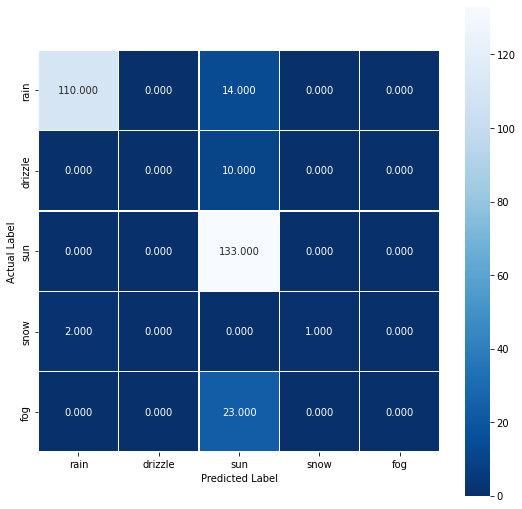

In [21]:
import seaborn as sns
plt.figure(figsize=(9,9))
labels=['rain', 'drizzle', 'sun', 'snow', 'fog']
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(score)

In [23]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))